En el siguiente trabajo se presentan una serie de programas en Python.

En el primer programa, se busca utilizar el método de congruencia lineal, cuya función es la siguiente:


$x_{n+1} = (a \cdot x_n + c) \mod M$

De esta manera, se utiliza dicha función para programar un generador de números aleatorios. A partir de este generador, queremos realizar un análisis estadístico, buscando correlaciones en las secuencias de números generados. Esto implica ver si los números están relacionados de alguna manera, lo que podría indicar que la secuencia no es completamente aleatoria. Además, se pretende evaluar los momentos de orden $(K)$ de la distribución obtenida, para luego comparar con la fórmula teórica $(\frac{1}{k+1})$. Esto ayudará a verificar la calidad de la distribución obtenida.

En la segunda parte de este mismo ejercicio, se busca simular caminatas aleatorias en 2D. Se busca generar desplazamientos en $(\Delta x)$ y $(\Delta y)$ aleatorios, que se encuentren en el intervalo $([- \sqrt{2}, \sqrt{2}])$. Además, se calcula la distancia desde el origen luego de un número $(N)$ de pasos.

El segundo programa busca simular la generación de tipos de galaxias dada una cierta distribución, es decir, genera aleatoriamente tipos de galaxias.

El tercer programa trata sobre un experimento aleatorio con dos dados y se enfoca en entender y comparar distribuciones de probabilidad teóricas y empíricas; teóricas y experimentales.





In [139]:
import numpy as np
import matplotlib.pyplot as plt
import random

Iniciamos creando el programa generador de numeros aleatorios.

In [140]:
#Defino la funcion inicialmente
def ran(a=57,c=1,M=256,x0=10):
    x=(a*x0+c)% M
    return(x)

In [141]:
ran()

59

In [142]:
def ran(N,a=57,c=1,M=256,x0=10): #Con esto defino los parametros de la funcion
    lista=[] #Genera una lista vacia 
    for i in range(N):
        x=(a*x0+c)% M #El valor mas grande que me puede dar esto es 255, el reultado nunca va a ser mayor a M
        x0=x
        lista.append(x) #Me guarda los x que voy generando en la lista
    return(lista)


In [143]:
lista=ran(257) #Con esto le defino el periodo, 1periodo, 2periodos etc
a=lista[0] #con esto le digo que me tome el primer valor de la lista
for i, b in  enumerate(lista[1:]): #Enumera las listas, entonces al imprimir me da el valor donde se repite el primer valor 
    if b==a:
     print(i)

   

255


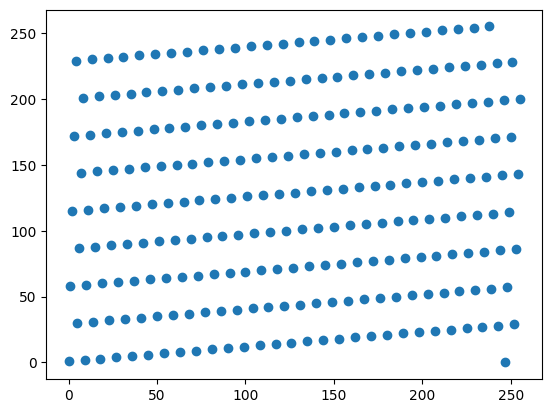

In [144]:
x=lista[0:-1]
y=lista[1:]
plt.plot(x,y,'o')

Con los parámetros anteriormente elegidos (a, c, M, \(x_1\)), no se observa un patrón aleatorio, sino que se observa cierta tendencia en la que los valores se relacionan de cierta manera. Por esto, a continuación, definimos un nuevo generador con valores adecuados para que realmente genere valores aleatorios.


In [145]:
def ran2(N,a=1664525,c=1013904223,M=2**32,x0=10): #Con esto defino los parametros de la funcion, estoy usando parametros bonitos, que me den realmente aleatorios
    lista=[] #Genera una lista vacia 
    for i in range(N):
        x=(a*x0+c)% M #El valor mas grande que me puede dar esto es 255, el reultado nunca va a ser mayor a M
        x0=x
        lista.append(x/M) #Me guarda los x que voy generando en la lista
    return(lista)


In [146]:
lista=ran2(100) #Con esto le defino el periodo, 1periodo, 2periodos etc
a=lista[0] #con esto le digo que me tome el primer valor de la lista
for i, b in  enumerate(lista[1:]): #Enumera las listas, entonces al imprimir me da el valor donde se repite el primer valor 
    if b==a:
     print(i)

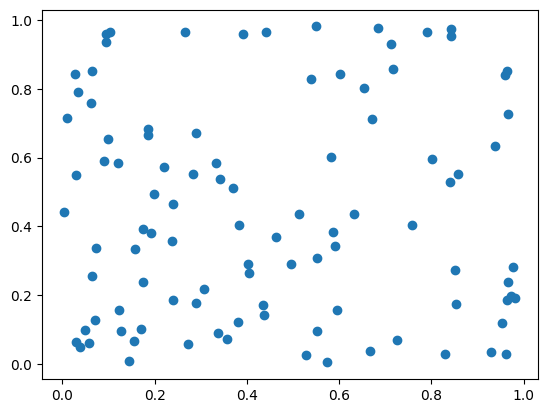

In [147]:
x=lista[0:-1]
y=lista[1:]
plt.plot(x,y,'o')

In [148]:
momento1=np.mean(np.array(lista))
momento3=np.mean(np.array(lista)**3)
momento7=np.mean(np.array(lista)**7)
print(momento1)
print(momento3)
print(momento7)

0.44104308729525654
0.2232524248537723
0.12687516106007826


In [149]:
N=[10,100,1000] #Creo una lista que tome del generador cierto numero de valores y me calcule los momentos, deberia observar que se acerca al teorico
for i in N: #Se busca calcular los momentos 1,3 y 7
    lista=ran2(i)
    momento1=np.mean(np.array(lista))
    momento3=np.mean(np.array(lista)**3)
    momento7=np.mean(np.array(lista)**7)
    print(momento1)
    print(momento3)
    print(momento7)

0.3484724601963535
0.13268240809954343
0.034876202761246006
0.44104308729525654
0.2232524248537723
0.12687516106007826
0.4855425436673686
0.24400701125171065
0.12478484941415362


Para la segunda parte de este ejercicio, queremos simular caminatas aleatorias en dos dimensiones. Se busca generar desplazamientos en la dirección \(\Delta x\) y \(\Delta y\).



In [150]:
#Ahora quiero realizar una caminata
N_pasos=1000 #Con esto 
x=np.array(ran2(N_pasos,x0=10))*2*np.sqrt(2)-np.sqrt(2)
y=np.array(ran2(N_pasos, x0=63))*2*np.sqrt(2)-np.sqrt(2)
    

(array([0.3696023 , 0.43574166, 0.36571175, 0.35793065, 0.39683615,
        0.34236844, 0.33069679, 0.31513459, 0.31513459, 0.32680624,
        0.33458734]),
 array([-1.41337006, -1.15633702, -0.89930399, -0.64227095, -0.38523792,
        -0.12820488,  0.12882815,  0.38586118,  0.64289422,  0.89992725,
         1.15696029,  1.41399332]),
 <BarContainer object of 11 artists>)

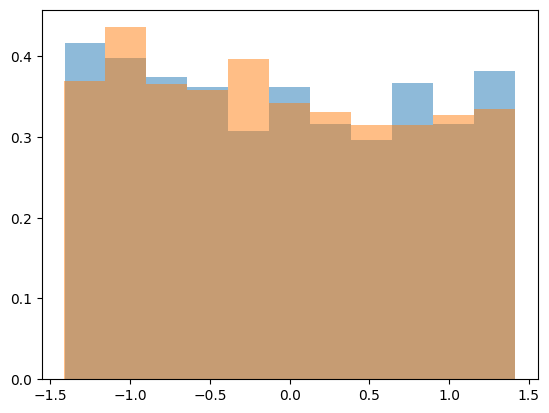

In [151]:
plt.hist(x,bins='auto',density=True,alpha=0.5)
plt.hist(y,bins='auto',density=True,alpha=0.5)

In [152]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [153]:
x=x.cumsum()
y=y.cumsum()#la funcion cumsum te suma todos los elementos anteriores y los acumula 

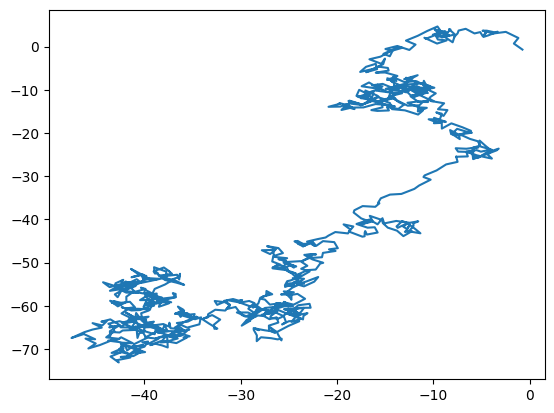

In [154]:
plt.plot(x,y)

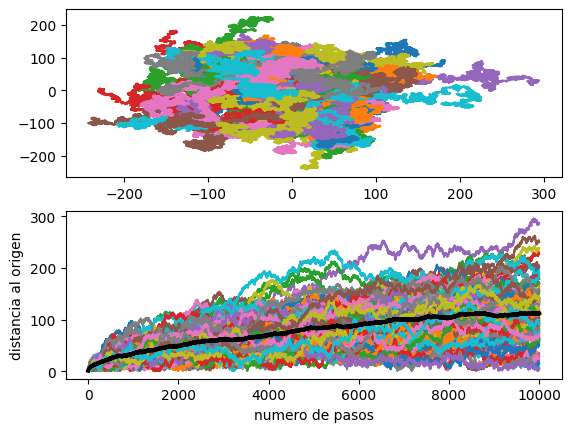

In [155]:
N_pasos=10000 #Con esto le doy que me haga cierto numero de caminatas aleatoreas
N_caminatas=100
#Quiero ver como es la dispercion a medida se va alejando
#Ahora quiero ver la media entre las caminatas
distancia=np.zeros((N_caminatas,N_pasos))
f, axs = plt.subplots(2,1)
for i in range(N_caminatas):
    x=np.array(ran2(N_pasos,x0=i))*2*np.sqrt(2)-np.sqrt(2)
    y=np.array(ran2(N_pasos, x0=i+27))*2*np.sqrt(2)-np.sqrt(2)
    x=x.cumsum()
    y=y.cumsum()#la funcion cumsum te suma todos los elementos anteriores y los acumula 
    axs[0].plot(x,y, label=f'caminante_{i}') 
    distancia[i,:]= np.sqrt((x**2)+(y**2))
    axs[1].plot(distancia[i,:])  #En el eje y tengo distancia al origen y en el eje x numero de pasos
axs[1].set_xlabel('numero de pasos')
axs[1].set_ylabel('distancia al origen')
axs[1].plot(distancia.mean(axis=0),lw=3,c='k') #Esto me da el valor medio de la distancia del numero de caminantes

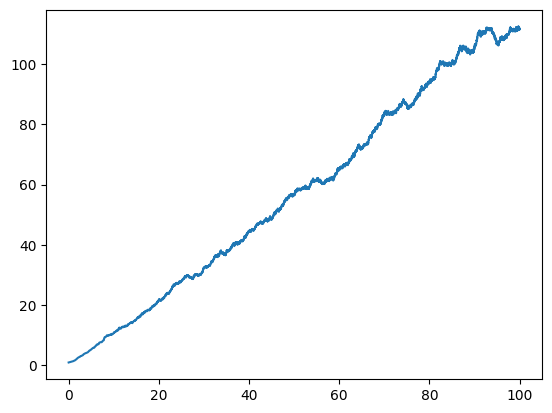

In [156]:
plt.plot(np.sqrt(np.arange(N_pasos)),distancia.mean(axis=0)) 
#Me grafica el valor de espectacion en funcion de raiz de N.

In [157]:
distancia.mean(axis=0)
#Valor de expectacion
expectacion = np.mean(distancia) #Media de todas las distancias
print(expectacion) #Calcula el valor de expectacion
expectacion_sqrt_N_caminatas = expectacion / np.sqrt(N_caminatas) # Calcula el valor de expectacion en función de la raíz cuadrada del número de caminatas
print(expectacion_sqrt_N_caminatas)

76.56642087183583
7.656642087183583


A continuación, queremos realizar un programa que tome el generador de valores buenos antes creado y genere aleatoriamente tipos de galaxias, siguiendo dicha distribución.


In [158]:
#Ejercicio de catalogo de Galaxias
#galaxias=[elipticas,espiral,enana,irregular] #listas de galaxias y probabilidades de catalogo
#probabilidad=[0.4,0.3,0.2,0.1]
lista_galaxias_generadas=[]
lista=ran2(100) 
for i in lista:
    if i<=0.4:
        lista_galaxias_generadas.append('elipticas')
    elif i<=0.7:
         lista_galaxias_generadas.append('espiral')
    elif i<=0.9:
         lista_galaxias_generadas.append('enana')
    else:
          lista_galaxias_generadas.append('irregular')
print(lista_galaxias_generadas)


['elipticas', 'elipticas', 'espiral', 'elipticas', 'elipticas', 'elipticas', 'espiral', 'enana', 'espiral', 'elipticas', 'elipticas', 'espiral', 'elipticas', 'espiral', 'elipticas', 'elipticas', 'elipticas', 'espiral', 'elipticas', 'espiral', 'espiral', 'elipticas', 'elipticas', 'irregular', 'elipticas', 'espiral', 'irregular', 'elipticas', 'espiral', 'elipticas', 'elipticas', 'espiral', 'elipticas', 'espiral', 'irregular', 'enana', 'elipticas', 'elipticas', 'irregular', 'elipticas', 'espiral', 'irregular', 'elipticas', 'elipticas', 'elipticas', 'elipticas', 'elipticas', 'enana', 'elipticas', 'elipticas', 'elipticas', 'enana', 'espiral', 'elipticas', 'irregular', 'enana', 'elipticas', 'elipticas', 'elipticas', 'irregular', 'espiral', 'espiral', 'elipticas', 'elipticas', 'enana', 'enana', 'espiral', 'elipticas', 'irregular', 'enana', 'espiral', 'elipticas', 'enana', 'irregular', 'elipticas', 'espiral', 'espiral', 'enana', 'irregular', 'elipticas', 'espiral', 'elipticas', 'espiral', 'ena

[51 13 24 12]


<BarContainer object of 4 artists>

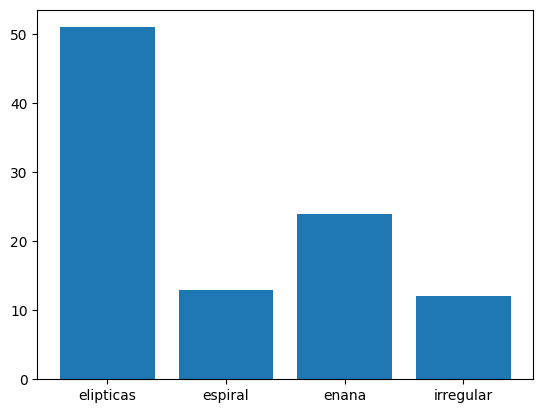

In [159]:
np.unique(lista_galaxias_generadas,return_counts=True)[1][0]
print(np.unique(lista_galaxias_generadas,return_counts=True)[1][:]
)
histograma=np.unique(lista_galaxias_generadas,return_counts=True)[1][:]
galaxias=['elipticas','espiral','enana','irregular']
plt.bar(galaxias,histograma)
#Ploteamos en un grafico de barras las galaxias generadas anteriormente

Queremos realizar un programa que lance dos dados y sume los resultados. De esta manera, podremos realizar la comparación teórica, empírica y experimental de los resultados obtenidos.

Para facilitar el proceso, comenzaremos programando un dado, luego la suma de dos dados por separado, y finalmente programaremos los dos dados para llevar a cabo el análisis experimental.


In [160]:
#Ejercicio de dados, el espacio muestral de un dado es 6 y de dos dados es 1/36
Dado1=[] 
lista=ran2(100)
for i in lista:
    if i<= 1/6:
        Dado1.append(1)
    elif i<=(2/6):
        Dado1.append(2)
    elif i<=(3/6):
        Dado1.append(3)
    elif i<=(4/6):
        Dado1.append(4)
    elif i<=(5/6):
        Dado1.append(5)
    else: 
        Dado1.append(6)



In [161]:
#Ejercicio de dados, esta celda lo que hace es asigna una suma de dos dados a cada número aleatorio en lista basado en intervalos de probabilidad acumulada.
Dado_suma=[] 
lista=ran2(10000)
for i in lista:
    if i<= 1/36:
        Dado_suma.append(2)
    elif i<=(3/36):
        Dado_suma.append(3)
    elif i<=(6/36):
        Dado_suma.append(4)
    elif i<=(10/36):
        Dado_suma.append(5)
    elif i<=(15/36):
        Dado_suma.append(6)
    elif i<=(21/36):
        Dado_suma.append(7)
    elif i<=(26/36):
        Dado_suma.append(8)
    elif i<=(30/36):
        Dado_suma.append(9)
    elif i<=(33/36):
        Dado_suma.append(10)
    elif i<=(35/36):
        Dado_suma.append(11)
    else: 
        Dado_suma.append(12)
#Dado_suma

<BarContainer object of 11 artists>

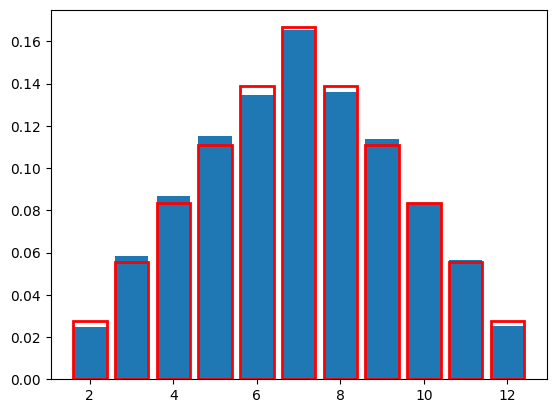

In [162]:
#plt.hist(Dado_suma,bins=11) #Aca genero la probabilidad empirica
valores,cuentas=np.unique(Dado_suma,return_counts=True)
plt.bar(valores,cuentas/cuentas.sum())
#Comparo con la probabilidad Teorica.
Lista_x=np.arange(2,13,1)
Lista_y=np.array((1,2,3,4,5,6,5,4,3,2,1))/36
plt.bar(Lista_x,Lista_y,fill=False,edgecolor='r',lw=2)


In [163]:
#Programemos los dos dados individuales que utilizaremos para el experimento.
Dado1=[] 
lista=ran2(2000)
for i in lista:
    if i<= 1/6:
        Dado1.append(1)
    elif i<=(2/6):
        Dado1.append(2)
    elif i<=(3/6):
        Dado1.append(3)
    elif i<=(4/6):
        Dado1.append(4)
    elif i<=(5/6):
        Dado1.append(5)
    else: 
        Dado1.append(6)
Dado2=[] 
lista=ran2(2000,x0=17)
for i in lista:
    if i<= 1/6:
        Dado2.append(1)
    elif i<=(2/6):
        Dado2.append(2)
    elif i<=(3/6):
        Dado2.append(3)
    elif i<=(4/6):
        Dado2.append(4)
    elif i<=(5/6):
        Dado2.append(5)
    else: 
        Dado2.append(6)

<BarContainer object of 11 artists>

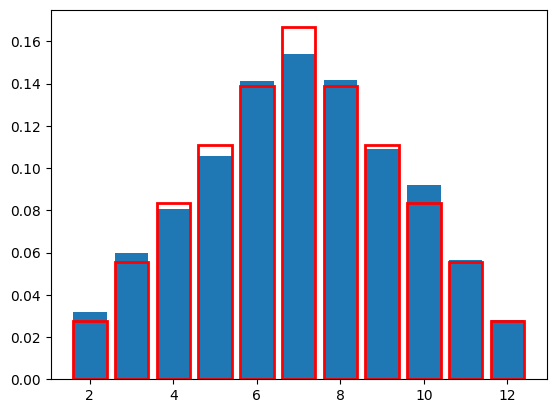

In [164]:
sum=np.array(Dado1)+np.array(Dado2) #Distribucion experimental
sum
valores,cuentas=np.unique(sum,return_counts=True)
plt.bar(valores,cuentas/cuentas.sum())
#Comparo con los valores teoricos.
Lista_x=np.arange(2,13,1)
Lista_y=np.array((1,2,3,4,5,6,5,4,3,2,1))/36
plt.bar(Lista_x,Lista_y,fill=False,edgecolor='r',lw=2)

\section{Conclusión}

En el primer programa, creamos un generador de números aleatorios con ciertos parámetros ($a$, $c$, $M$, $x_1$) y calculamos el período (que es 255), es decir, cuántos números se generan antes de que la secuencia se repita. A continuación, se estudió la correlación entre los valores generados y se observó que los valores se relacionan de cierta forma, lo cual no determina necesariamente que el generador sea bueno. Para abordar esto, creamos otro generador con parámetros adecuados que proporcionan la tendencia aleatoria que buscamos. Al graficar los resultados, observamos que no existe (o no se puede determinar fácilmente) una relación entre los valores, indicando que el generador es más adecuado.

Continuando con el mismo ejercicio, utilizamos el buen generador para simular caminatas aleatorias que se apartan del origen en las coordenadas $X$ y $Y$. Observamos la dispersión y graficamos la distancia al origen en función del número de pasos. Se observa que, a medida que los caminantes se alejan del punto de partida, la dispersión aumenta, lo cual es esperado en una caminata aleatoria. La línea promedio proporciona una vista general del comportamiento típico esperado: a medida que aumenta el número de pasos, la dispersión crece. Las distancias se calcularon según la norma euclídea.

En el segundo programa, tomamos el buen generador y, a partir de 100 valores, generamos tipos de galaxias o las clasificamos según una distribución de probabilidad. El gráfico de barras proporciona una representación visual útil de la distribución de tipos de galaxias generadas. Podemos observar cuál es el tipo de galaxia más frecuente y cuán equitativa es la distribución. Se observó un mayor número de galaxias 'elípticas'.

Por último, en el programa de dados, se generó inicialmente una secuencia de números aleatorios para un dado, asignando un resultado a cada número aleatorio basado en intervalos de probabilidad acumulada. Luego, simulamos la suma de dos dados, generando una secuencia aleatoria y asignando una suma de dos dados a cada valor aleatorio, de la misma forma que con el dado solo, basado en intervalos de probabilidad acumulada, es decir, sumando las probabilidades. En el gráfico se mostró la distribución empírica de la suma de dos dados y se comparó con la distribución teórica. Se observó que las sumas centrales (valor 7) son más frecuentes que las extremas (2 y 12). Lo esperado es que la suma teórica y empírica coincidan; a medida que se toman mayor cantidad de valores, deberían acercarse. Finalmente, se programaron dos dados individuales y se sumaron los resultados obtenidos de tirar los dos dados. Se observó que la distribución empírica varía de la teórica, lo cual se debe al número de valores aleatorios utilizados; al aumentar el número de valores, ambas distribuciones deberían acercarse y coincidir con la teórica. El modelo de simulación para generar la suma de dos dados es efectivo.

